In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data.shape

(1460, 81)

In [6]:
# Find percentage of null values in each column
null_percentage = data.isnull().mean() * 100

# Display the percentage of null values in each column
null_percentage[null_percentage>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [7]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
# Set display options to show all columns
pd.set_option('display.max_rows', None)

# Determine if each column is numeric or categorical
column_types = data.dtypes

# Display the column types
column_types

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Lot frontage and MasVnrArea seems to be the only numeric variables with null values

In [9]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [10]:
# replace null values in lot frontage with its median
data['LotFrontage'] = data['LotFrontage'].fillna(69)

In [11]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [12]:
# Replace with median value
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [13]:
numeric_columns = data.select_dtypes(include=['int', 'float'])

In [14]:
numeric_columns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
def create_dummy_variables(data, column, level_to_drop=None):
    """
    Create dummy variables for a given column in a DataFrame and drop a specific level.
    
    Args:
    data (pandas DataFrame): The input DataFrame.
    column (str): The column name for which to create dummy variables.
    level_to_drop (str, optional): The level to drop. Default is None.
    
    Returns:
    pandas DataFrame: The updated DataFrame with dummy variables.
    """
    dummies = pd.get_dummies(data[column], prefix=column)
    if level_to_drop:
        dummies = dummies.drop(column + '_' + level_to_drop, axis=1)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(column, axis=1)
    return data

## EDA of Categorical variables and dummy creation

For categorical variables with
1) Largely uneven or imbalance in distributions, we will remove the variable as it doesn't add an value to our model.
2) For levels in a categorical variables with too few observations, we will classify all into a new column "Other". This is done to avoid memorization and overfitting

### MSSubClass

In [16]:
data['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

<Axes: xlabel='MSSubClass', ylabel='count'>

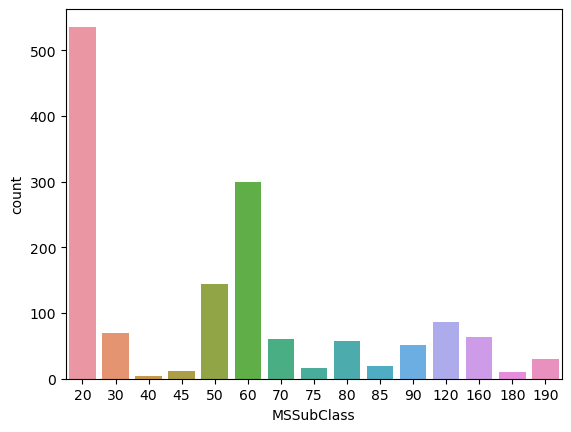

In [17]:
sns.countplot(x=data['MSSubClass'])

In [18]:
data['MSSubClass'].isnull().mean()*100

0.0

Let us do some segmented univariate analysis of MSSubClass with respect to the sale price.

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

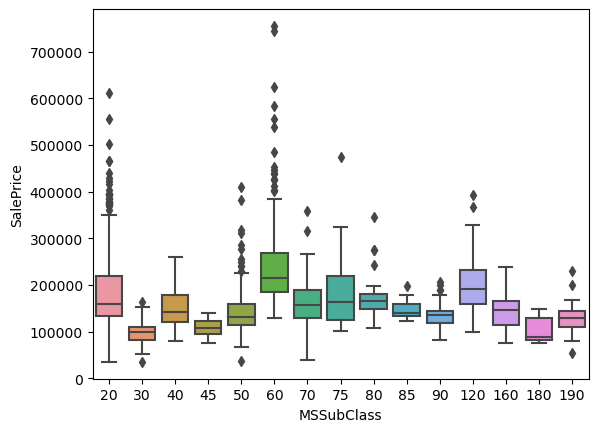

In [19]:
sns.boxplot(data=data, y=data['SalePrice'], x=data['MSSubClass'])

No reasonable patterns can be observed here.

Let us now create dummies for this variable

In [20]:
# Create dummy variables for column MSSubClass
dummies = pd.get_dummies(data['MSSubClass'], prefix='MSSubClass', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummies], axis=1)

# Drop the original MSSubClass column
data = data.drop('MSSubClass', axis=1)

# Display the updated DataFrame
data.head()

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,0
1,2,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
2,3,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,0
3,4,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,1,0,0,0,0,0,0,0,0
4,5,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,1,0,0,0,0,0,0,0,0,0


### MSZoning

In [21]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

We see here that MSZoning property has FV, RH and C levels for a very few number of times. The problem with these kind of levels is that they contribute to the noise and can lead to the overfitting of the model. Since, there is not enough data in these levels to observe trends and patterns, the model has a high chance of overfitting. To avoid this we will assign these values to a new level called "Other".

In [22]:
# Replace specific values in column MSZoning with 'Other'
data['MSZoning'] = data['MSZoning'].replace(['FV', 'RH', 'C (all)'], 'Other')

# Display the updated DataFrame
data['MSZoning'].value_counts()

RL       1151
RM        218
Other      91
Name: MSZoning, dtype: int64

In [23]:
data['MSZoning'].isnull().mean()*100

0.0

In [24]:
data = create_dummy_variables(data, 'MSZoning', 'Other')

In [25]:
data.head()

,Id,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RL,MSZoning_RM
0,1,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,1,0
1,2,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,1,0
2,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,1,0
3,4,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,1,0
4,5,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,1,0


### Street

In [26]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

There is a lot of imbalance in the data here. Grvl is present only 6 times and this column might not add a lot of value to our data set.

In [27]:
data = data.drop('Street', axis=1)

### LotShape

In [28]:
data['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

<Axes: xlabel='LotShape', ylabel='count'>

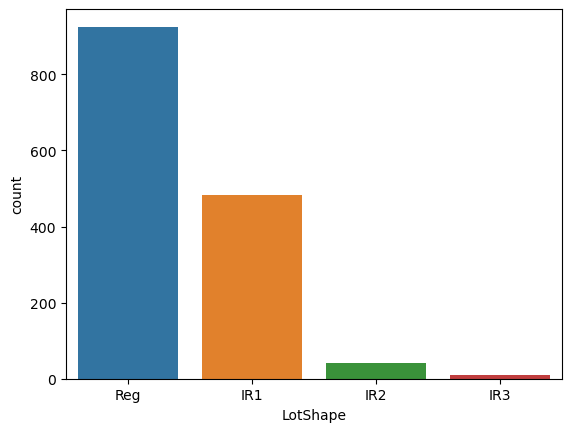

In [29]:
sns.countplot(x=data['LotShape'])

<Axes: xlabel='LotShape', ylabel='SalePrice'>

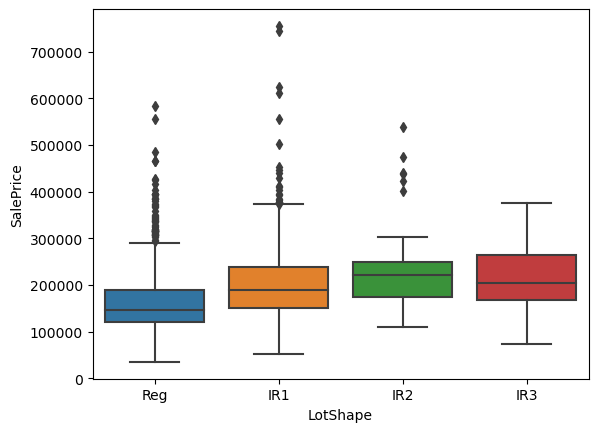

In [30]:
sns.boxplot(data=data, y=data['SalePrice'], x=data['LotShape'])

Lets combine 'IR2' and 'IR3' into another level named other.

In [31]:
# Replace specific values in column MSZoning with 'Other'
data['LotShape'] = data['LotShape'].replace(['IR2', 'IR3'], 'Other')

# Display the updated DataFrame
data['LotShape'].value_counts()

Reg      925
IR1      484
Other     51
Name: LotShape, dtype: int64

In [32]:
data['LotShape'].isnull().mean()*100

0.0

In [33]:
data = create_dummy_variables(data, 'LotShape', 'Other')

### LandContour

In [34]:
data['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

<Axes: xlabel='LandContour', ylabel='count'>

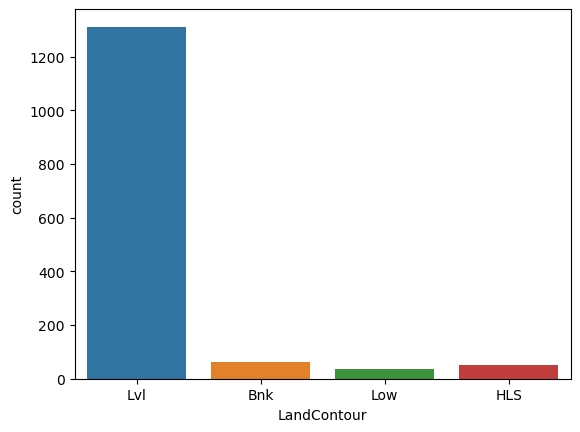

In [35]:
sns.countplot(x=data['LandContour'])

<Axes: xlabel='LandContour', ylabel='SalePrice'>

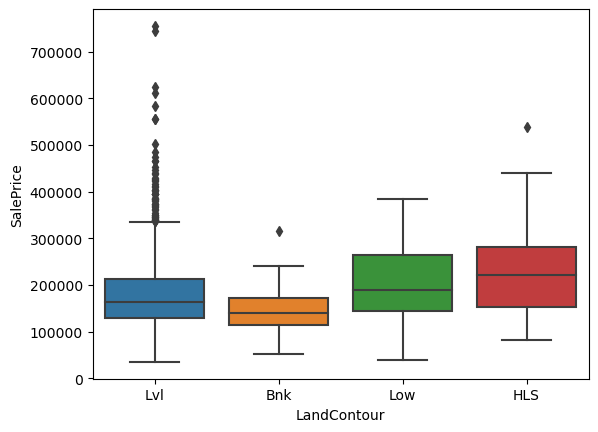

In [36]:
sns.boxplot(data, x='LandContour', y='SalePrice')

It is a known fact that most houses are built on level lands and rather than slopish lands. The levels 'Bnk', 'Low' and 'SLS' are all non level land contours. We can classify these as 'Other' level since their counts are very low as mentioned above.

In [37]:
data['LandContour'] = data['LandContour'].replace(['Bnk', 'Low', 'HLS'], 'Other')

In [38]:
data['LandContour'].value_counts()

Lvl      1311
Other     149
Name: LandContour, dtype: int64

In [39]:
data = create_dummy_variables(data, 'LandContour', 'Other')

### Utilities

In [40]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Lot of imbalance in data, most houses have all facilities and hence we can drop this column.

In [41]:
data = data.drop('Utilities', axis=1)

### Lot Config

In [42]:
data['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

<Axes: xlabel='LotConfig', ylabel='SalePrice'>

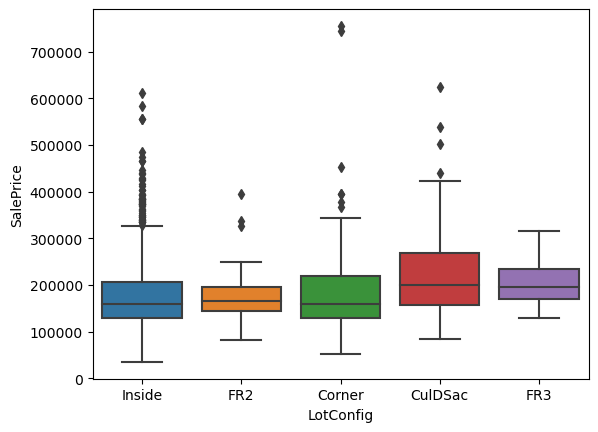

In [43]:
sns.boxplot(data, x='LotConfig', y='SalePrice')

In [44]:
data['LotConfig'] = data['LotConfig'].replace(['FR2', 'FR3'], 'Other')

In [45]:
data = create_dummy_variables(data, 'LotConfig', 'Other')

### LandSlope

In [46]:
data['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

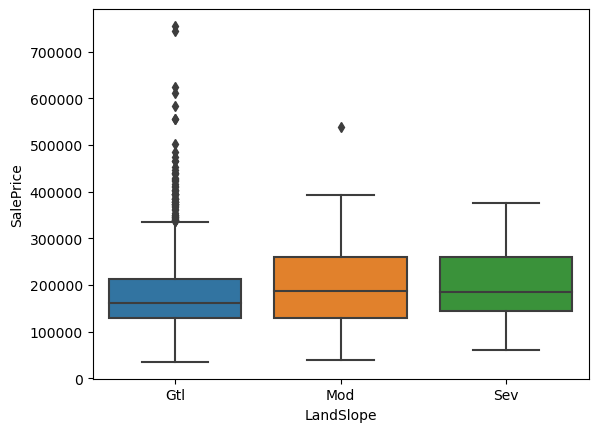

In [47]:
sns.boxplot(data, x='LandSlope', y='SalePrice')

In [48]:
# data imbalance
data = data.drop('LandSlope', axis=1)

### Neighborhood

In [49]:
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

<Axes: xlabel='SalePrice', ylabel='Neighborhood'>

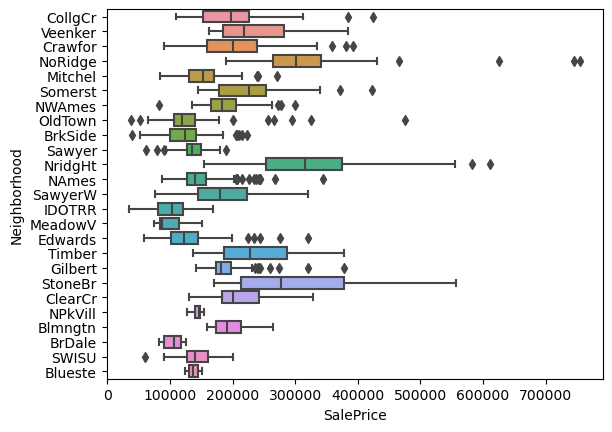

In [50]:
sns.boxplot(data, y='Neighborhood', x='SalePrice')

In [51]:
data['Neighborhood'].isnull().mean()*100

0.0

In [52]:
data['Neighborhood'] = data['Neighborhood'].replace(['MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'], 'Other')

In [53]:
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
Other       72
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Name: Neighborhood, dtype: int64

In [54]:
data = create_dummy_variables(data, 'Neighborhood', 'Other')

### Condition1

In [55]:
data['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [56]:
data['Condition1'].isnull().mean()*100

0.0

<Axes: xlabel='SalePrice', ylabel='Condition1'>

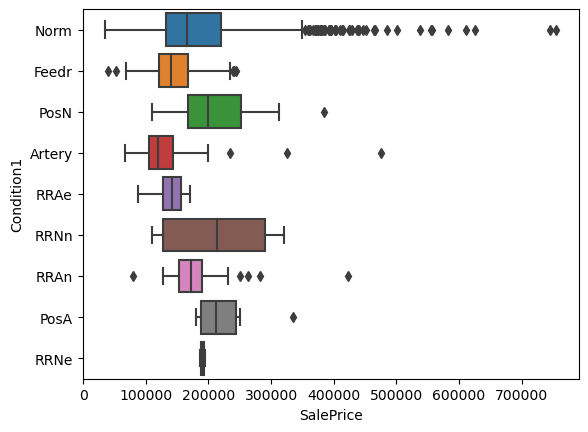

In [57]:
sns.boxplot(data, y='Condition1', x='SalePrice')

In [58]:
data['Condition1'] = data['Condition1'].replace(['RRAn', 'PosN', 'BrDale', 'RRAe', 'PosA', 'RRNn', 'RRNe'], 'Other')

In [59]:
data['Condition1'].value_counts()

Norm      1260
Feedr       81
Other       71
Artery      48
Name: Condition1, dtype: int64

In [60]:
data = create_dummy_variables(data, 'Condition1', 'Other')

### Condition2

In [61]:
data['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

Most of the secondary conditions are marked normal. Hence we can remove this column.

In [62]:
data = data.drop('Condition2', axis=1)

### BldgType

In [63]:
data['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [64]:
data['BldgType'].isnull().mean()*100

0.0

<Axes: xlabel='SalePrice', ylabel='BldgType'>

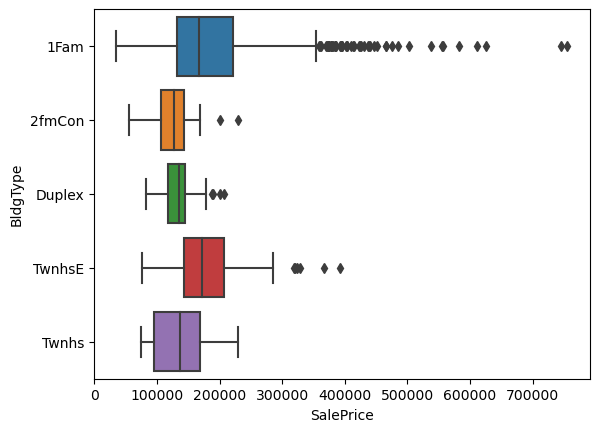

In [65]:
sns.boxplot(data, y='BldgType', x='SalePrice')

In [66]:
data = data.drop('BldgType', axis=1)

### HouseStyle

In [67]:
data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

<Axes: xlabel='SalePrice', ylabel='HouseStyle'>

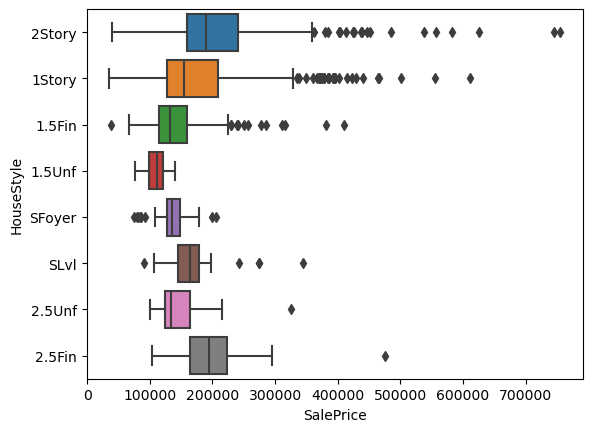

In [68]:
sns.boxplot(data, y='HouseStyle', x='SalePrice')

In [69]:
data['HouseStyle'].isnull().mean()*100

0.0

In [70]:
data['HouseStyle'] = data['HouseStyle'].replace(['SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'], 'Other')

In [71]:
data = create_dummy_variables(data, 'HouseStyle', 'Other')

### RoofStyle

In [72]:
data['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [73]:
data['RoofStyle'].isnull().mean()*100

0.0

<Axes: xlabel='SalePrice', ylabel='RoofStyle'>

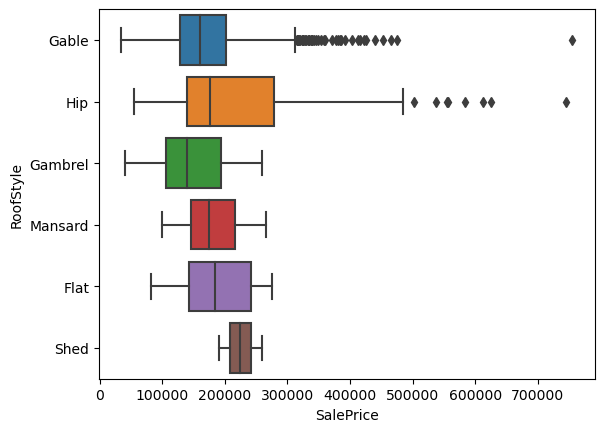

In [74]:
sns.boxplot(data, y='RoofStyle', x='SalePrice')

In [75]:
data['RoofStyle'] = data['RoofStyle'].replace(['Flat', 'Gambrel', 'Mansard', 'Shed'], 'Other')

In [76]:
data = create_dummy_variables(data, 'RoofStyle', 'Other')

### RoofMatl

In [77]:
data['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [78]:
data = data.drop('RoofMatl', axis=1)

Lot of imbalance towards CompShg, and hence this variable will not contribute much to our model. Removing it.

### Exterior1st

In [79]:
data['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [80]:
data['Exterior1st'].isnull().mean()*100

0.0

<Axes: xlabel='SalePrice', ylabel='Exterior1st'>

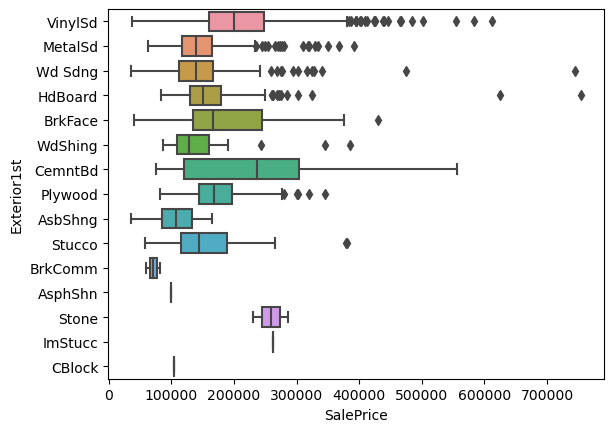

In [81]:
sns.boxplot(data, y='Exterior1st', x='SalePrice')

In [82]:
data['Exterior1st'] = data['Exterior1st'].replace(['WdShing', 'Stucco', 'AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock'], 'Other')

In [83]:
data = create_dummy_variables(data, 'Exterior1st', 'Other')

### Exterior2nd

In [84]:
data['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [85]:
data['Exterior2nd'].isnull().mean()*100

0.0

<Axes: xlabel='SalePrice', ylabel='Exterior2nd'>

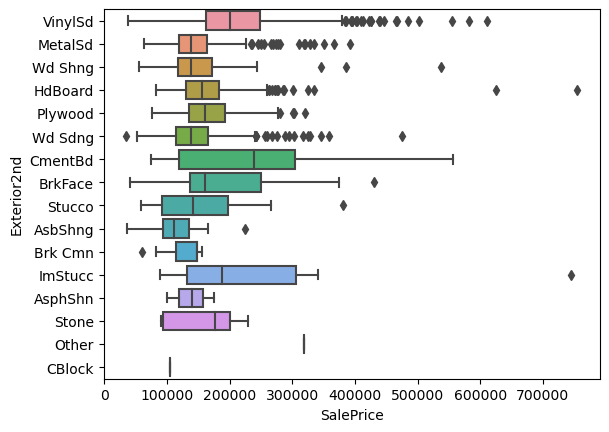

In [86]:
sns.boxplot(data, y='Exterior2nd', x='SalePrice')

In [87]:
data['Exterior2nd'] = data['Exterior2nd'].replace(['Stucco', 'BrkFace', 'AsbShng', 'ImStucc', 'Brk Cmn', 'AsphShn', 'ImStucc', 'Stone', 'AsphShn', 'CBlock'], 'Other')

In [88]:
data = create_dummy_variables(data, 'Exterior2nd', 'Other')

### MasVnrType

In [89]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [90]:
data['MasVnrType'].isnull().mean()*100

0.547945205479452

<Axes: xlabel='SalePrice', ylabel='MasVnrType'>

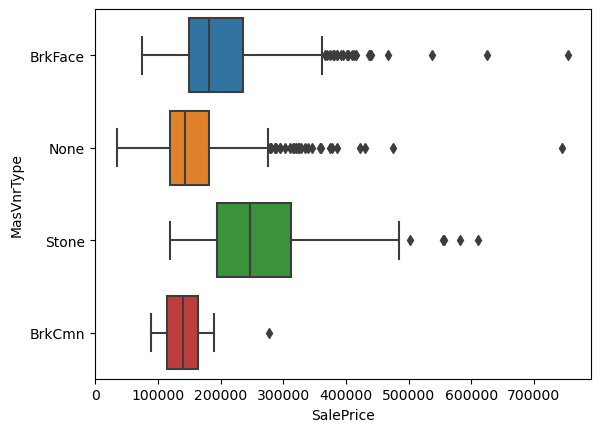

In [91]:
sns.boxplot(data, y='MasVnrType', x='SalePrice')

In [92]:
data = create_dummy_variables(data, 'MasVnrType', 'None')

### ExterQual

In [93]:
data['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [94]:
data['ExterQual'].isnull().mean()*100

0.0

<Axes: xlabel='ExterQual', ylabel='SalePrice'>

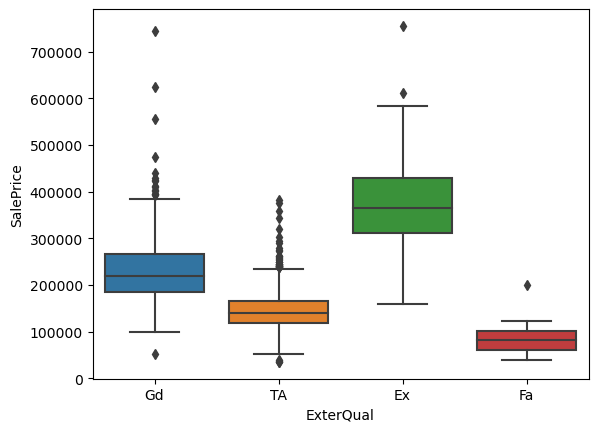

In [95]:
sns.boxplot(data, x='ExterQual', y='SalePrice')

In [96]:
data = create_dummy_variables(data, 'ExterQual', 'Fa')

### ExterCond

In [97]:
data['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [98]:
data['ExterCond'].isnull().mean()*100

0.0

In [99]:
data = data.drop('ExterCond', axis=1)

### Foundation

In [100]:
data['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [101]:
data['Foundation'].isnull().mean()*100

0.0

<Axes: xlabel='SalePrice', ylabel='Foundation'>

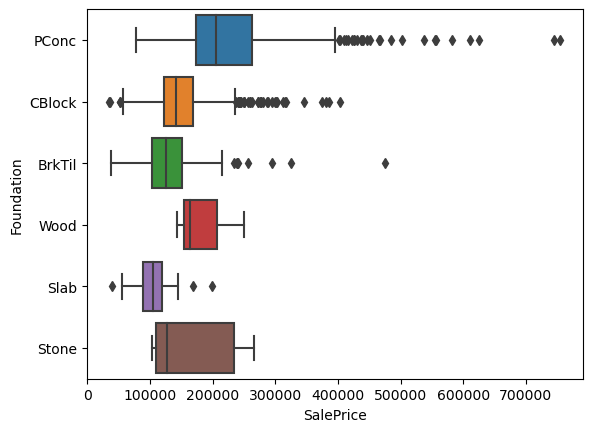

In [102]:
sns.boxplot(data, y='Foundation', x='SalePrice')

In [103]:
data['Foundation'] = data['Foundation'].replace(['Slab', 'Stone', 'Wood'], 'Other')

In [104]:
data = create_dummy_variables(data, 'Foundation', 'Other')

### BsmtQual

In [105]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [106]:
data['BsmtQual'].isnull().sum()

37

Lets have all null values equated to Typical or Average (TA)

<Axes: xlabel='BsmtQual', ylabel='SalePrice'>

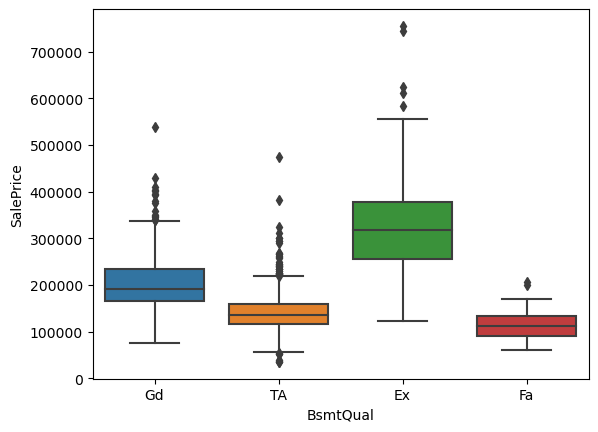

In [107]:
sns.boxplot(data, y='SalePrice', x='BsmtQual')

This also shows that the higher the basement the higher the price of the house.

In [108]:
data = create_dummy_variables(data, 'BsmtQual', 'Fa')

### BsmtCond

In [109]:
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [110]:
data['BsmtCond'].isnull().sum()

37

In [111]:
data = data.drop('BsmtCond', axis=1)

### BsmtExposure

In [112]:
data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [113]:
data['BsmtExposure'].isnull().sum()

38

<Axes: xlabel='BsmtExposure', ylabel='SalePrice'>

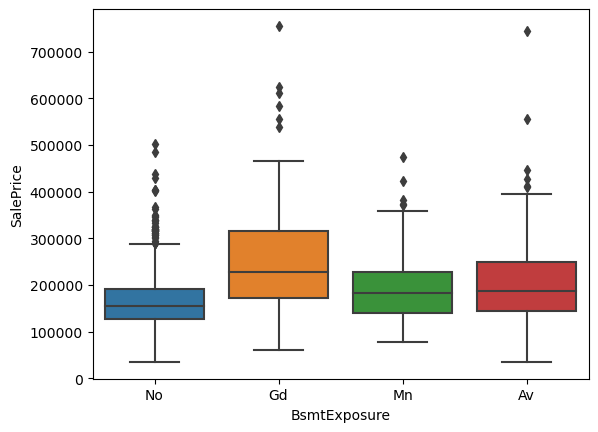

In [114]:
sns.boxplot(data, y='SalePrice', x='BsmtExposure')

Lets have the null values be replaced with 'No' i.e. no exposure. Since that is the mode.

In [115]:
data['BsmtExposure'] = data['BsmtExposure'].fillna('No')

In [116]:
data = create_dummy_variables(data, 'BsmtExposure', 'No')

### BsmtFinType1

In [117]:
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [118]:
data['BsmtFinType1'].isnull().sum()

37

Replacing all null values with mode 'Unf'

In [119]:
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('Unf')

<Axes: xlabel='BsmtFinType1', ylabel='SalePrice'>

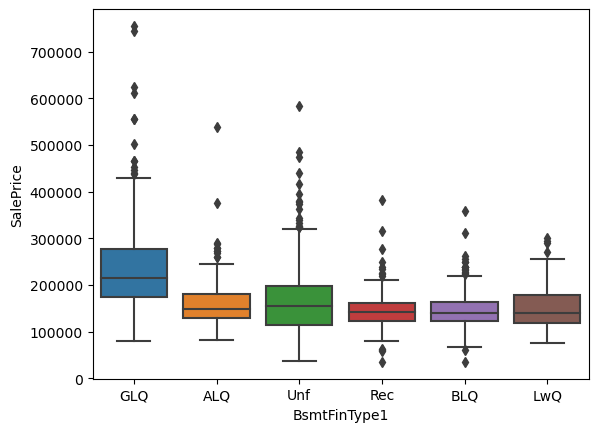

In [120]:
sns.boxplot(data, y='SalePrice', x='BsmtFinType1')

In [121]:
data = create_dummy_variables(data, 'BsmtFinType1', 'Unf')

### BsmtFinType2

In [122]:
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [123]:
data['BsmtFinType2'].isnull().sum()

38

In [124]:
data = data.drop('BsmtFinType2', axis=1)

### Heating

In [125]:
data['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [126]:
data['Heating'].isnull().sum()

0

In [127]:
data = data.drop('Heating', axis=1)

### HeatingQC

In [128]:
data['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [129]:
data['HeatingQC'].isnull().sum()

0

<Axes: xlabel='HeatingQC', ylabel='SalePrice'>

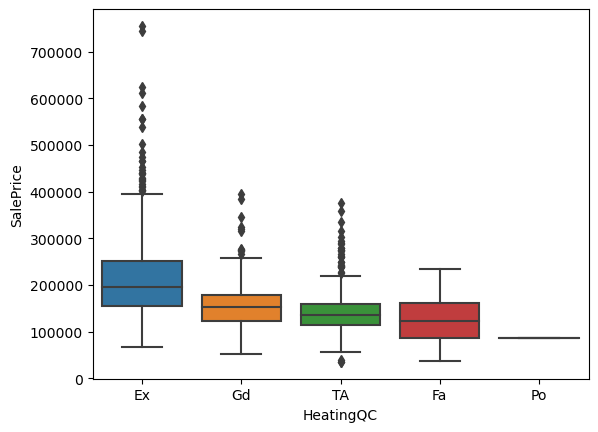

In [130]:
sns.boxplot(data, y='SalePrice', x='HeatingQC')

In [131]:
data = data.replace(['Fa', 'Po'], 'Other')

In [132]:
data = create_dummy_variables(data, 'HeatingQC', 'Other')

### CentralAir

In [133]:
data['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [134]:
data['CentralAir'].isnull().sum()

0

<Axes: xlabel='CentralAir', ylabel='SalePrice'>

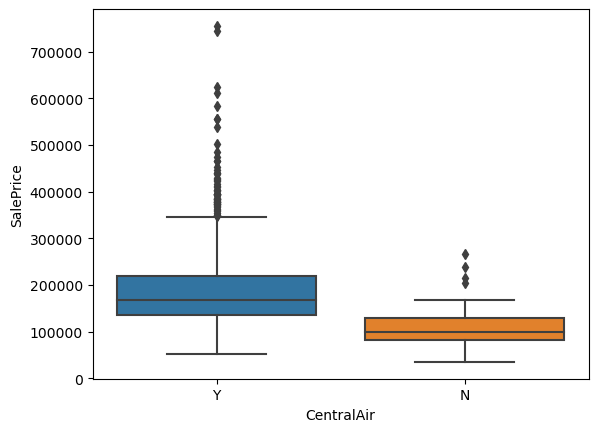

In [135]:
sns.boxplot(data, y='SalePrice', x='CentralAir')

In [136]:
data = create_dummy_variables(data, 'CentralAir', 'N')

### Electrical

In [137]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [138]:
data['Electrical'].isnull().sum()

1

In [139]:
data = data.drop('Electrical', axis=1)

### KitchenQual

In [140]:
data['KitchenQual'].value_counts()

TA       735
Gd       586
Ex       100
Other     39
Name: KitchenQual, dtype: int64

In [141]:
data['KitchenQual'].isnull().sum()

0

<Axes: xlabel='KitchenQual', ylabel='SalePrice'>

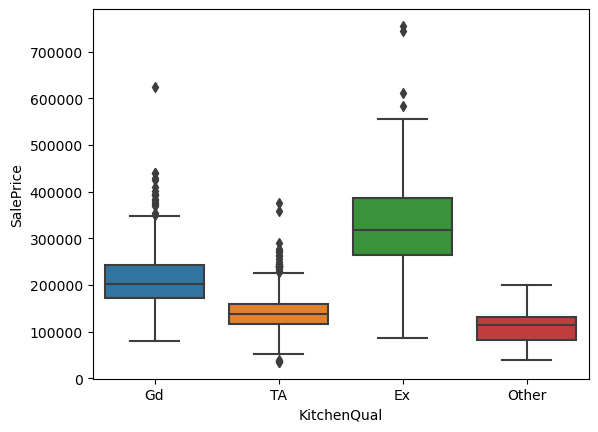

In [142]:
sns.boxplot(data, y='SalePrice', x='KitchenQual')

In [143]:
data = create_dummy_variables(data, 'KitchenQual', 'Other')

### Functional

In [144]:
data['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [145]:
data['Functional'].isnull().sum()

0

In [146]:
data = data.drop('Functional', axis=1)

### FireplaceQu

In [147]:
data['FireplaceQu'].value_counts()

Gd       380
TA       313
Other     53
Ex        24
Name: FireplaceQu, dtype: int64

In [148]:
data['FireplaceQu'].isnull().sum()

690

In [149]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('Gd')

<Axes: xlabel='FireplaceQu', ylabel='SalePrice'>

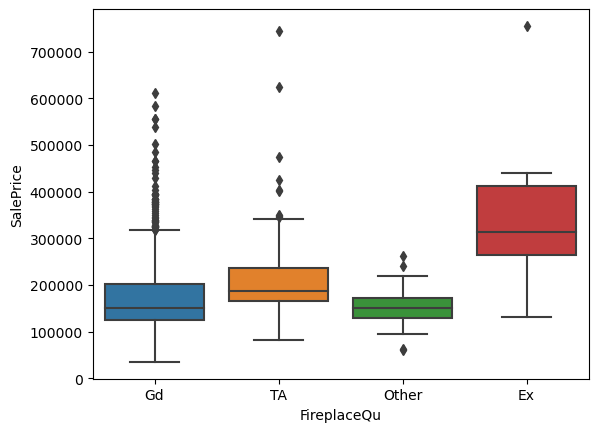

In [150]:
sns.boxplot(data, x='FireplaceQu', y='SalePrice')

In [151]:
data = create_dummy_variables(data, 'FireplaceQu', 'Other')

### GarageType

In [152]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [153]:
data['GarageType'].isnull().sum()

81

In [154]:
data['GarageType'] = data['GarageType'].fillna('Attchd')

<Axes: xlabel='GarageType', ylabel='SalePrice'>

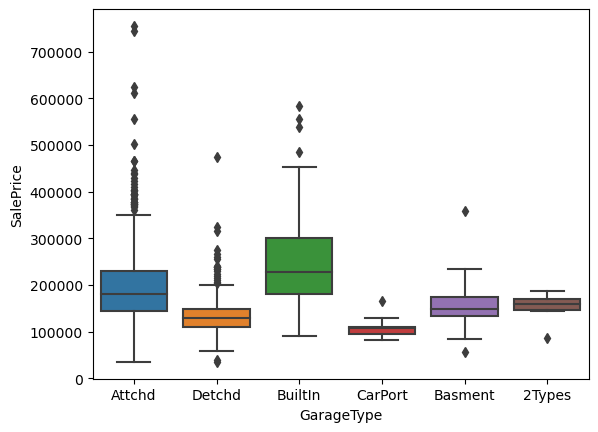

In [155]:
sns.boxplot(data, x='GarageType', y='SalePrice')

In [156]:
data['GarageType'] = data['GarageType'].replace(['Basment', 'CarPort', '2Types'], 'Other')

In [157]:
data = create_dummy_variables(data, 'GarageType', 'Other')

### GarageFinish

In [158]:
data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [159]:
data['GarageFinish'].isnull().sum()

81

In [160]:
data['GarageFinish'] = data['GarageFinish'].fillna('Unf')

<Axes: xlabel='GarageFinish', ylabel='SalePrice'>

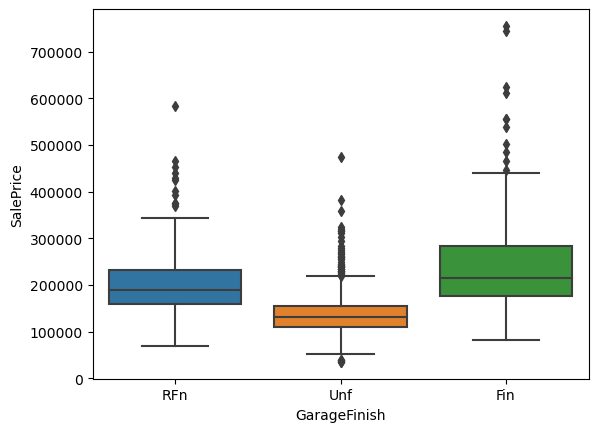

In [161]:
sns.boxplot(data, y='SalePrice', x='GarageFinish')

In [162]:
data = create_dummy_variables(data, 'GarageFinish', 'Unf')

### GarageQual

In [163]:
data['GarageQual'].value_counts()

TA       1311
Other      51
Gd         14
Ex          3
Name: GarageQual, dtype: int64

In [164]:
data = data.drop('GarageQual', axis=1)

### GarageCond

In [165]:
data['GarageCond'].value_counts()

TA       1326
Other      42
Gd          9
Ex          2
Name: GarageCond, dtype: int64

In [166]:
data = data.drop('GarageCond', axis=1)

### PavedDrive

In [167]:
data['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [168]:
data = data.drop('PavedDrive', axis=1)

### Fence

In [169]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Looks like most houses have no fence.

In [170]:
data['Fence'].isnull().sum()

1179

<Axes: xlabel='Fence', ylabel='SalePrice'>

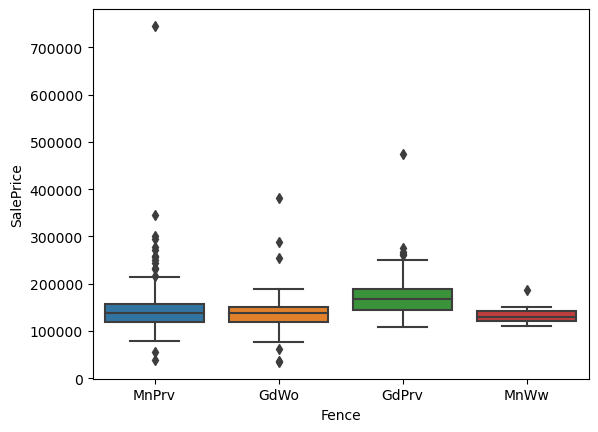

In [171]:
sns.boxplot(data, y='SalePrice', x='Fence')

In [172]:
data = data.drop('Fence', axis=1)

### MiscFeature

In [173]:
data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [174]:
data = data.drop('MiscFeature', axis=1)

### SaleType

In [175]:
data['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [176]:
data = data.drop('SaleType', axis=1)

### SaleCondition

In [177]:
data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

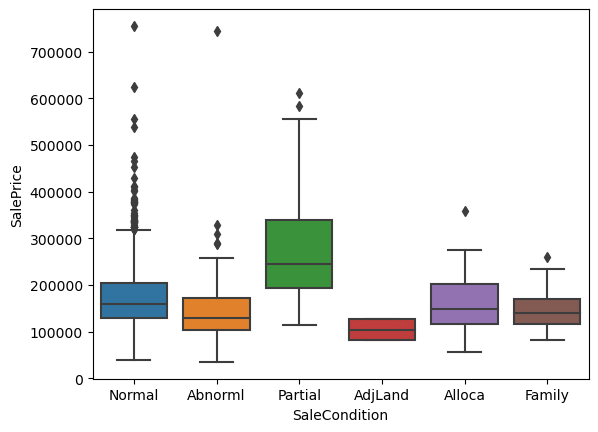

In [178]:
sns.boxplot(data, x='SaleCondition', y='SalePrice')

In [179]:
data = data.drop('SaleCondition', axis=1)

### Alley

In [180]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [181]:
data = data.drop('Alley', axis=1)

### PoolQC

In [182]:
data['PoolQC'].value_counts()

Gd       3
Ex       2
Other    2
Name: PoolQC, dtype: int64

In [183]:
# too less data points
data = data.drop('PoolQC', axis=1)

In [184]:
data.shape

(1460, 136)

In [185]:
data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Ex', 'FireplaceQu_Gd',
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn'],
      dtype='object', length=136)

## Numeric variable analysis and cleaning

In [186]:
data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Ex', 'FireplaceQu_Gd',
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn'],
      dtype='object', length=136)

In [187]:
data = data.drop('Id', axis=1)

We have a lot of date related variables. `YearBuilt`, `YearRemodAdd`, `YrSold`, `GarageYrBlt`, `MoSold`. The only business driven data metric we can derive from these is the age of the house. Once we do that, the above mentioned variables are not going to add a lot of value to our dataset. We remove them.

In [188]:
data['Age'] = data.apply(lambda x: x['YrSold'] - x['YearBuilt'], axis=1)

In [189]:
data = data.drop(['YearBuilt', 'YrSold', 'YearRemodAdd', 'GarageYrBlt', 'MoSold'], axis=1)

In [190]:
numeric_columns = data.select_dtypes(include=['float', 'int']).columns

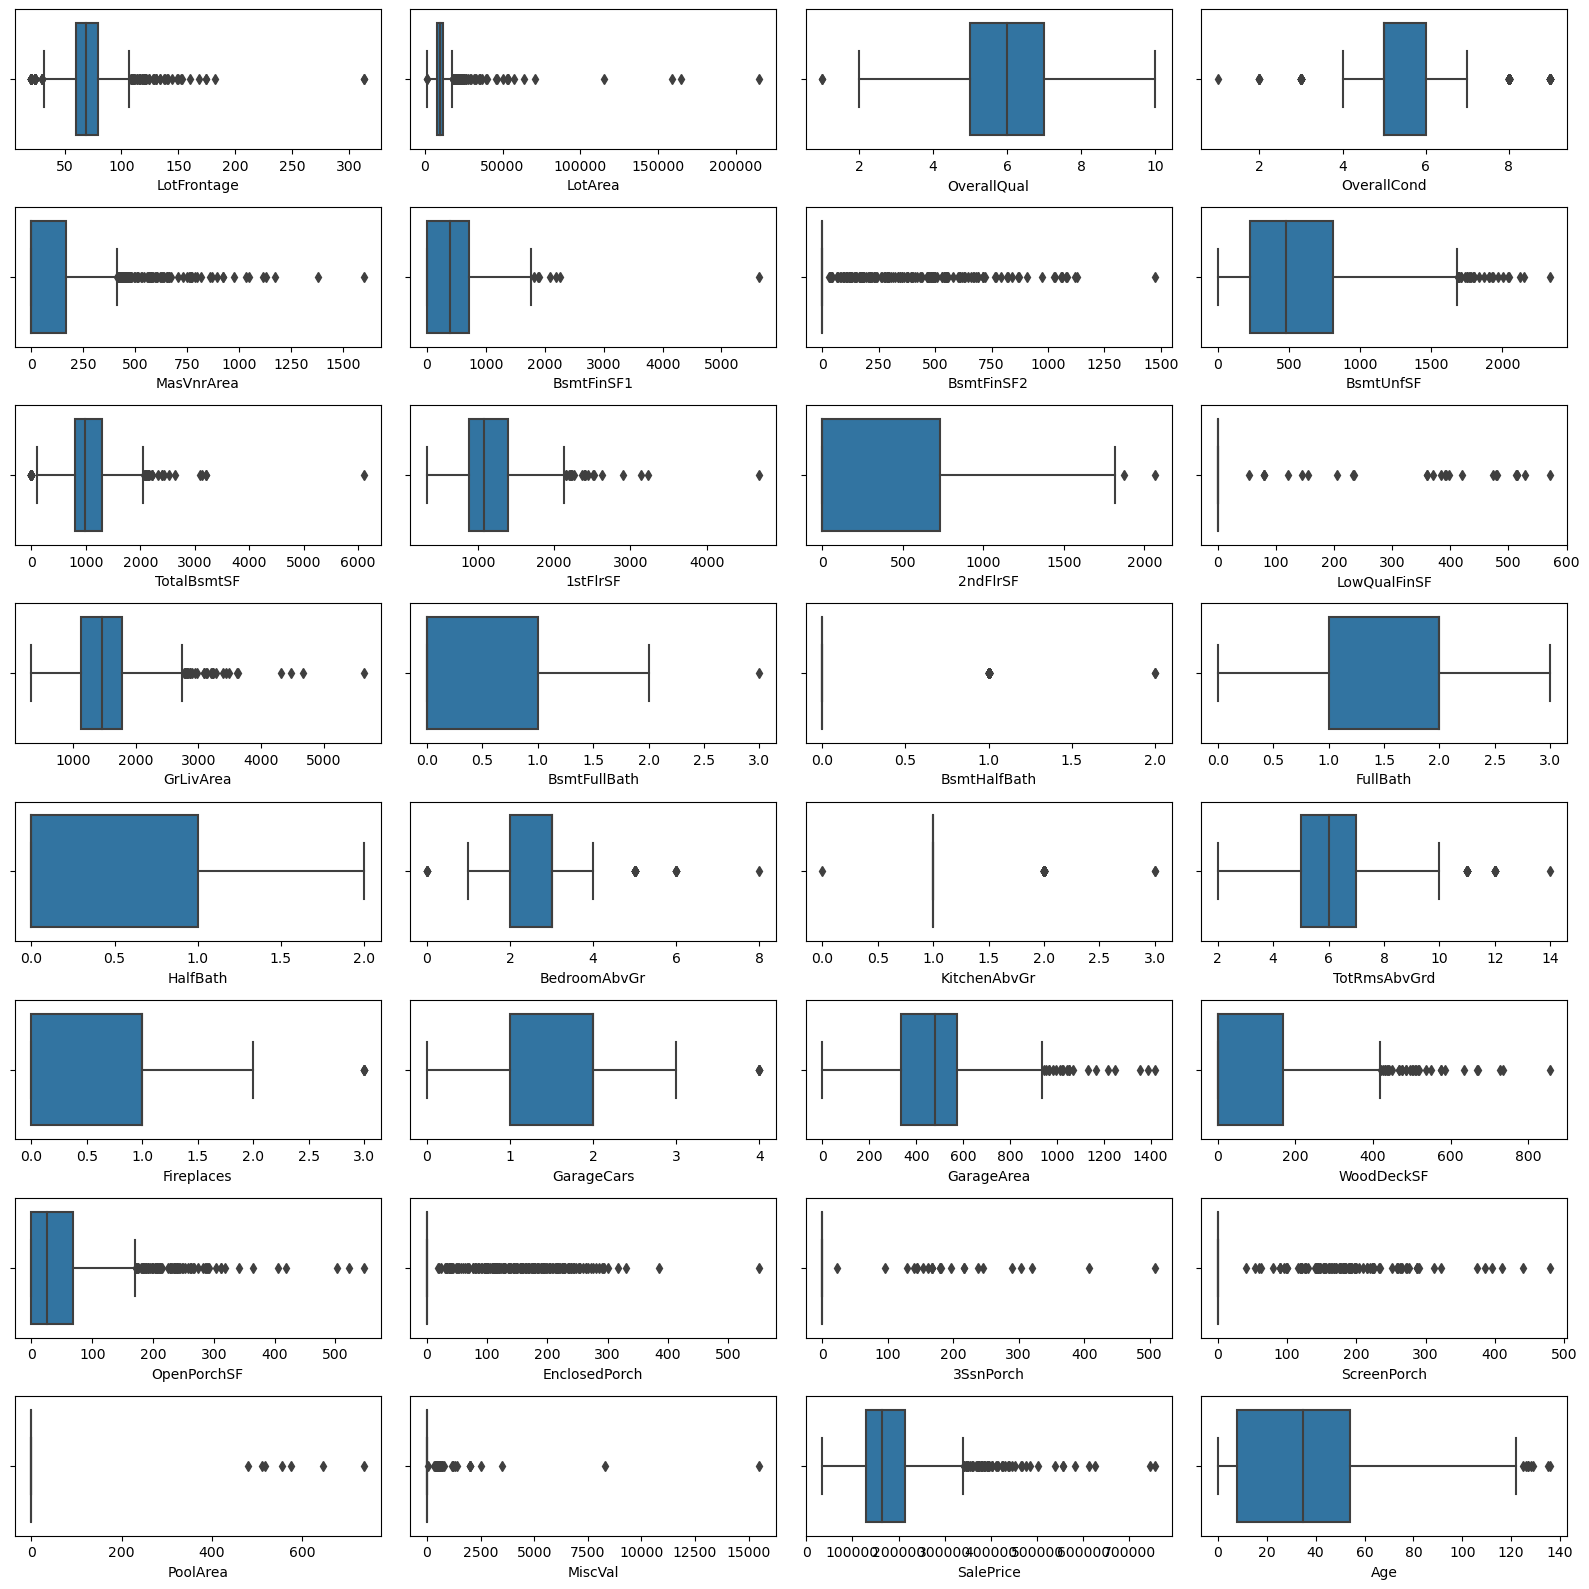

In [191]:
fig, axes = plt.subplots(8, 4, figsize=(16, 16))
axes = axes.flatten()
for i, predictor in enumerate(numeric_columns):
    sns.boxplot(x=predictor, data=data, ax=axes[i])

plt.tight_layout()
plt.show()

Of the various plots given above we see that there are outliers on almost each variable inclusing the target variable `SalePrice`. However, a few variables show very narrow IQR on the box plots. Let's inspect them to see if there is any odd behaviour.

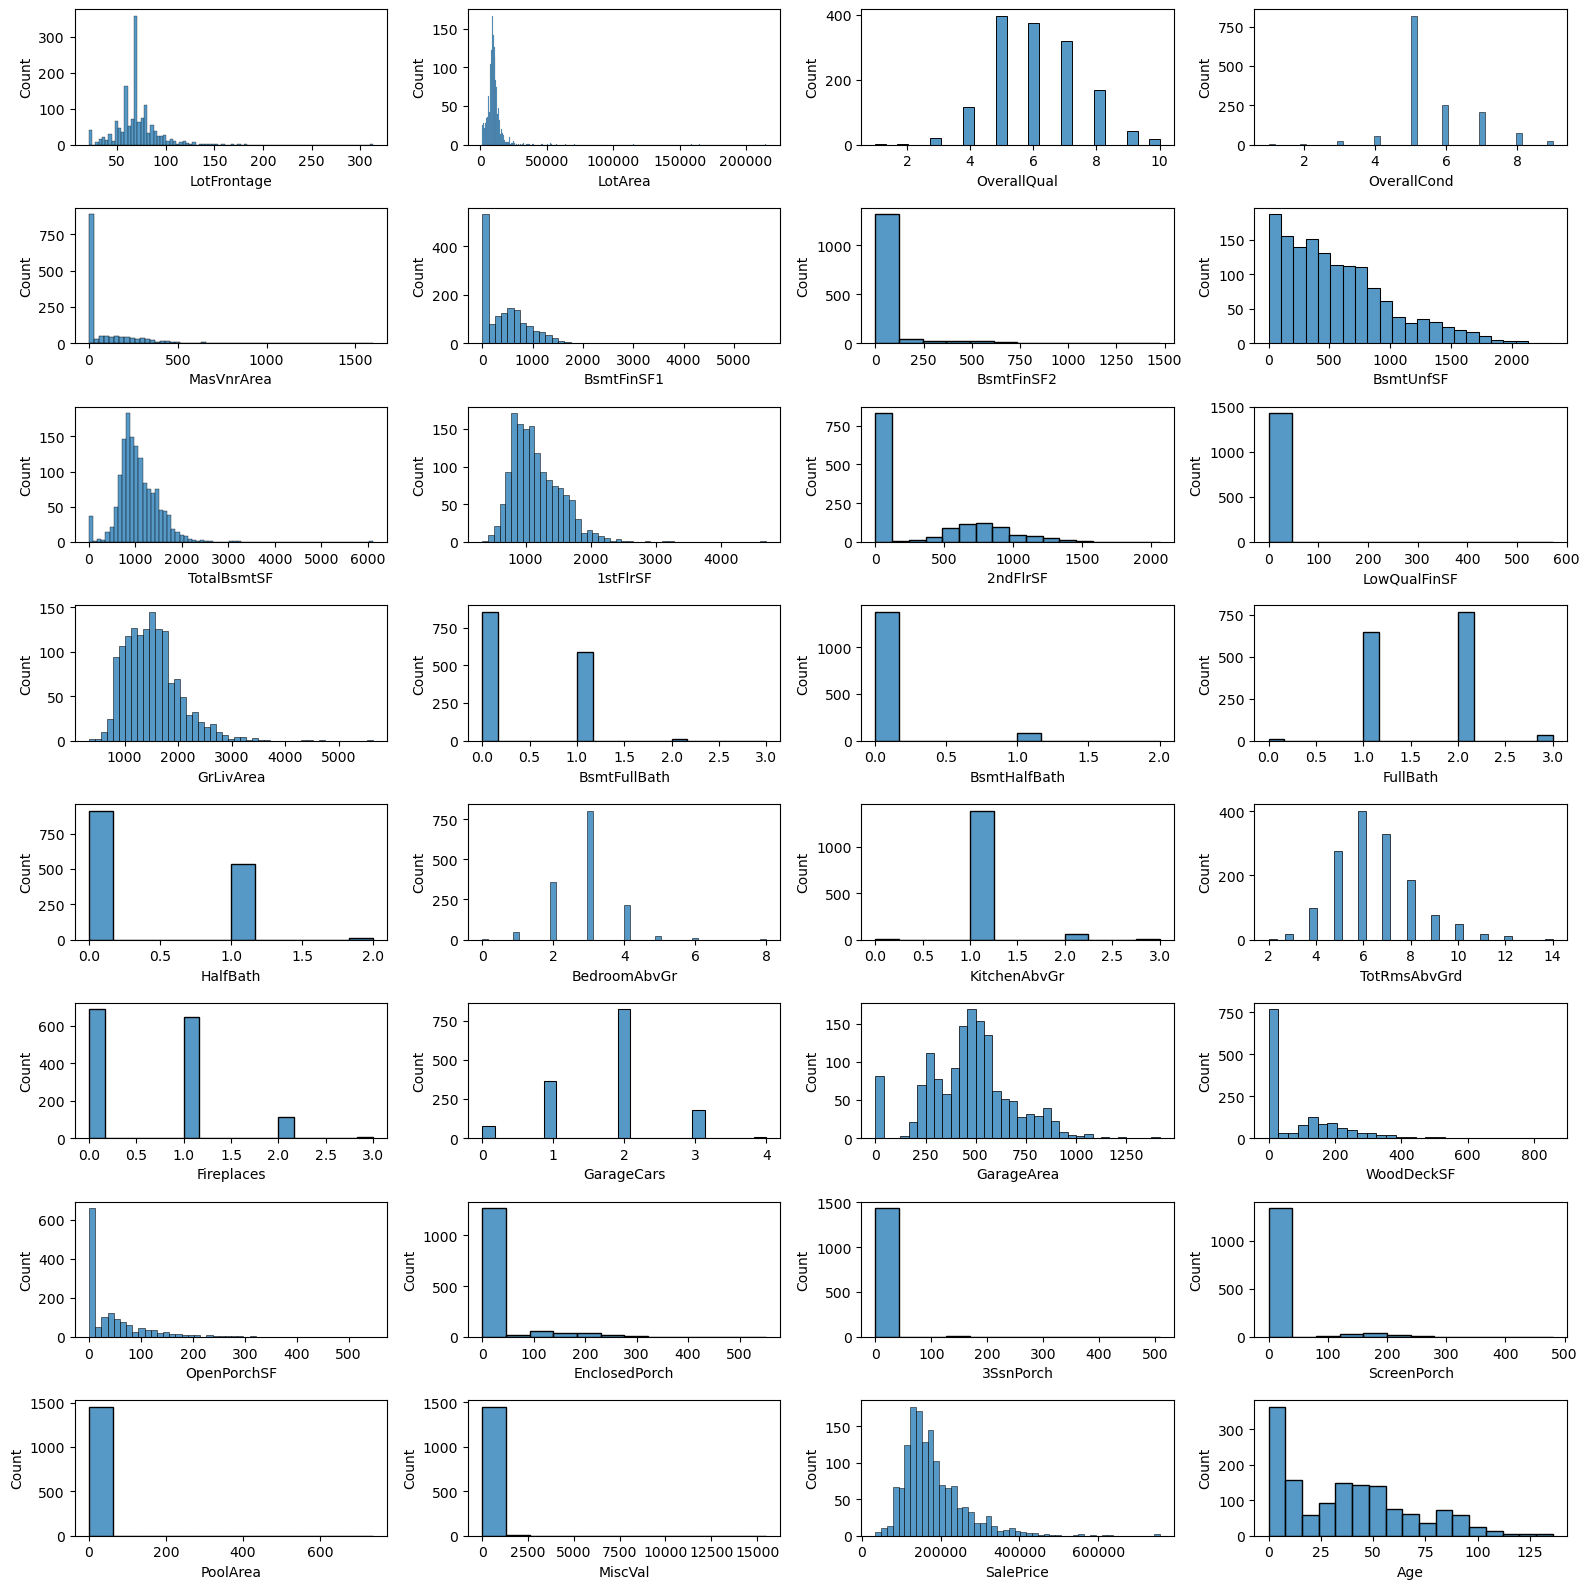

In [192]:
fig, axes = plt.subplots(8, 4, figsize=(16, 16))
axes = axes.flatten()
for i, predictor in enumerate(numeric_columns):
    sns.histplot(x=predictor, data=data, ax=axes[i])

plt.tight_layout()
plt.show()


There seem to be a lot of numeric variables that are mostly 0 for most observations. Lets remove these variables.

In [193]:
for column in numeric_columns:
    if data[column].mode()[0] == 0:
        print(data[column].value_counts().iloc[0:3])
        print('\n')

0.0      869
180.0      8
72.0       8
Name: MasVnrArea, dtype: int64


0     467
24     12
16      9
Name: BsmtFinSF1, dtype: int64


0      1293
180       5
374       3
Name: BsmtFinSF2, dtype: int64


0      118
728      9
384      8
Name: BsmtUnfSF, dtype: int64


0      37
864    35
672    17
Name: TotalBsmtSF, dtype: int64


0      829
728     10
504      9
Name: 2ndFlrSF, dtype: int64


0      1434
80        3
360       2
Name: LowQualFinSF, dtype: int64


0    856
1    588
2     15
Name: BsmtFullBath, dtype: int64


0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64


0    913
1    535
2     12
Name: HalfBath, dtype: int64


0    690
1    650
2    115
Name: Fireplaces, dtype: int64


0      81
440    49
576    47
Name: GarageArea, dtype: int64


0      761
192     38
100     36
Name: WoodDeckSF, dtype: int64


0     656
36     29
48     22
Name: OpenPorchSF, dtype: int64


0      1252
112      15
96        6
Name: EnclosedPorch, dtype: int64


0      1436
168       

Dropping columns with most values 0 as they can lead to an overfit model.

In [194]:
data = data.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'LowQualFinSF', 'BsmtFinSF2'], axis=1)

In [195]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [196]:
# remove values beyond the 95% percentile and treat them as outliers.
data['SalePrice'].quantile([0.95])

0.95    326100.0
Name: SalePrice, dtype: float64

In [197]:
data = data[data['SalePrice'] < 326100]

In [198]:
numeric_columns = data.select_dtypes(include=['float', 'int']).columns

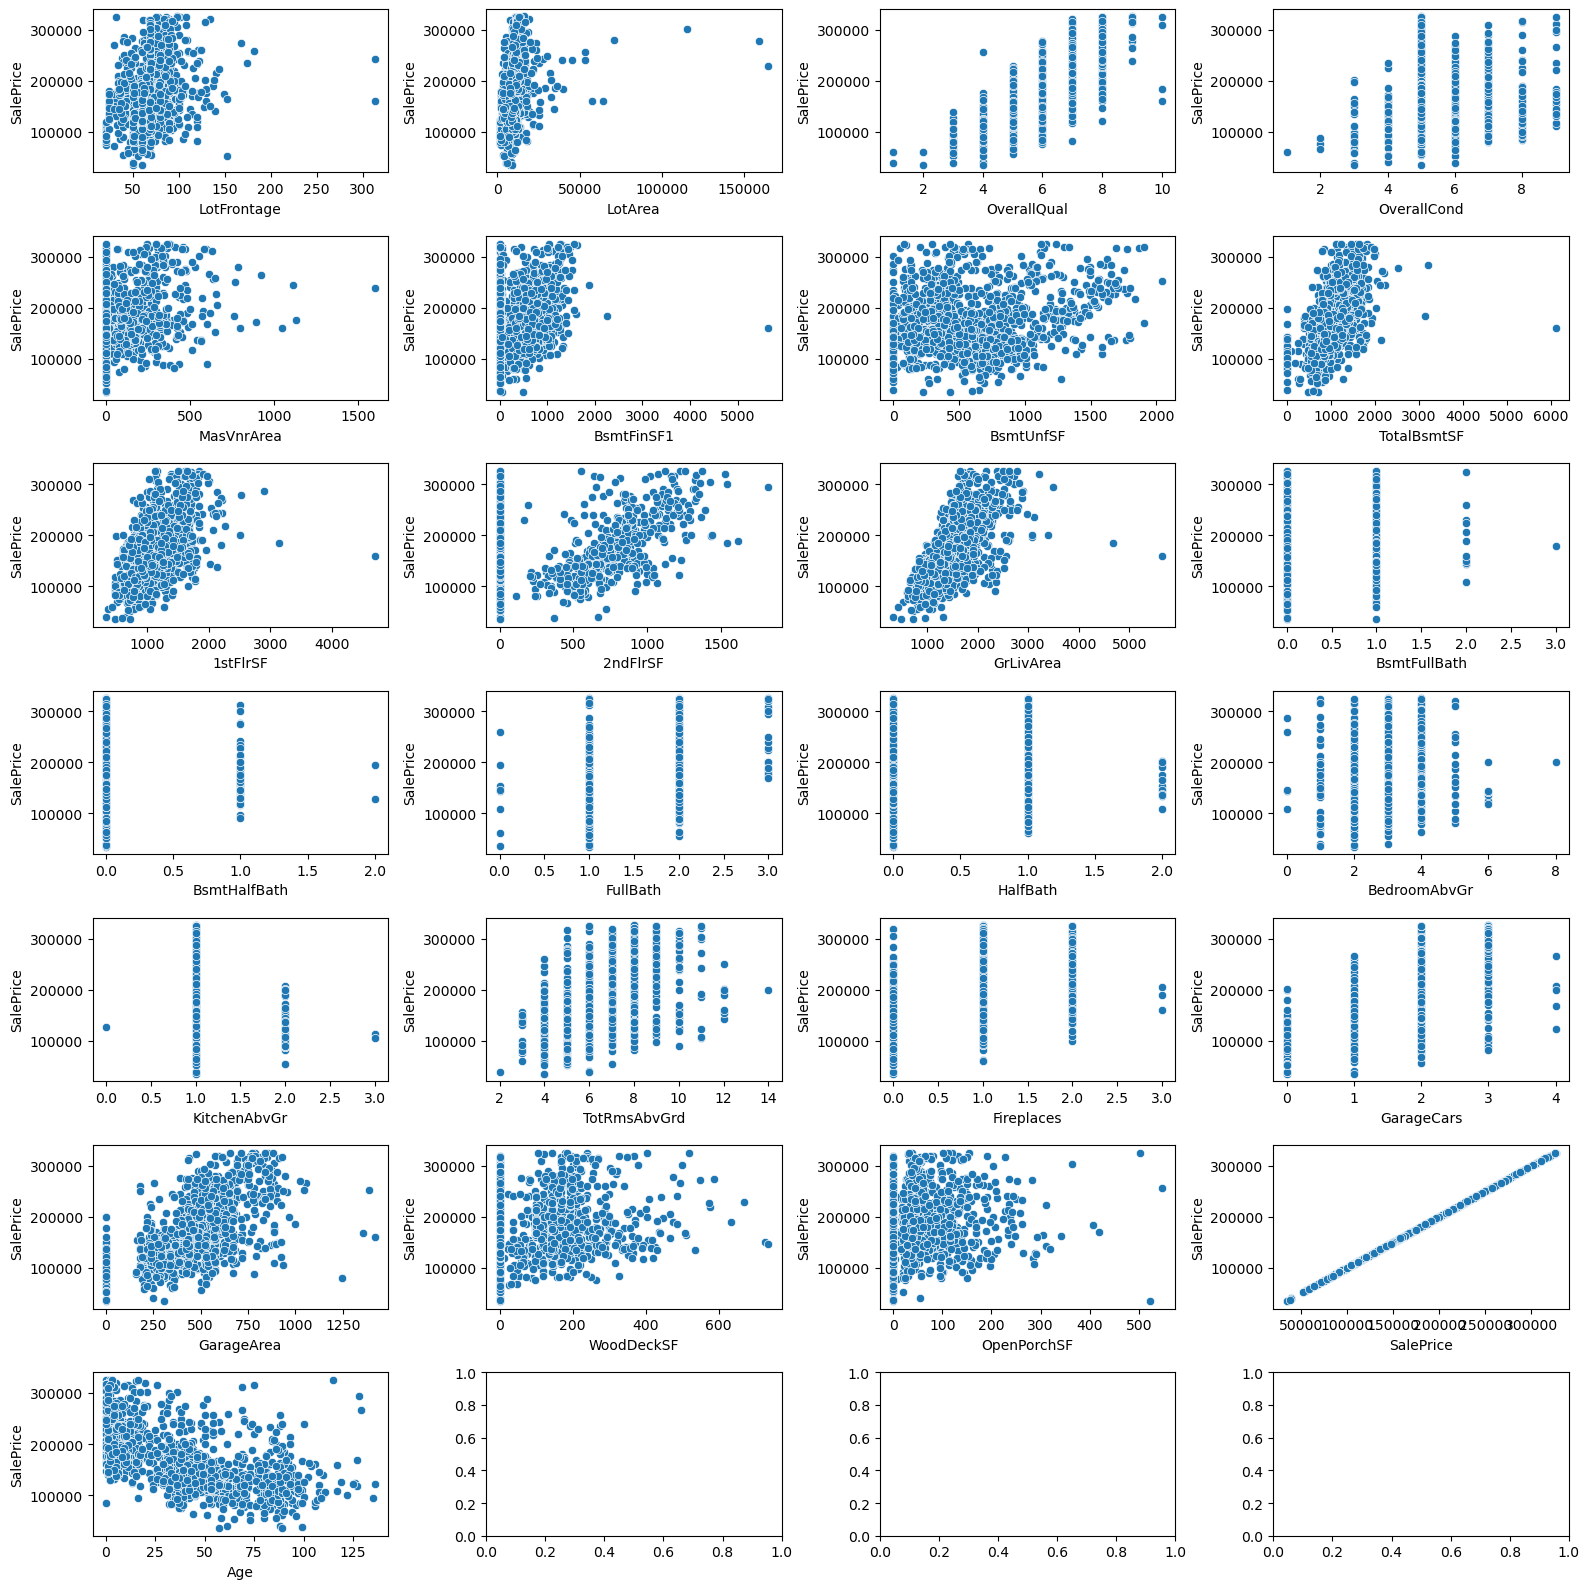

In [199]:
fig, axes = plt.subplots(7, 4, figsize=(16, 16))
axes = axes.flatten()
for i, predictor in enumerate(numeric_columns):
    sns.scatterplot(x=predictor, y='SalePrice', data=data, ax=axes[i])

plt.tight_layout()
plt.show()

In [200]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Split into train and test sets

In [201]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

### Scaling the dataset

In [202]:
from sklearn.preprocessing import MinMaxScaler

In [203]:
scaler = MinMaxScaler()

In [204]:
print(numeric_columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'Age'],
      dtype='object')


In [205]:
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

In [206]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Gd,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,Age
277,0.407534,0.113114,0.333333,0.500,0.0,0.021262,0.364349,0.141408,0.121615,0.000000,0.099849,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.166667,0.000000,0.5,0.282087,0.000000,0.000000,0.364480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0.433824
141,0.195205,0.065599,0.666667,0.500,0.0,0.230333,0.212537,0.283797,0.321248,0.000000,0.263753,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.416667,0.000000,0.5,0.465444,0.217391,0.043876,0.773274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0.007353
1389,0.133562,0.029803,0.555556,0.625,0.0,0.066442,0.176298,0.120295,0.122763,0.191969,0.166541,0.000000,0.5,0.333333,0.0,0.375,0.333333,0.333333,0.333333,0.5,0.310296,0.000000,0.000000,0.330127,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0.485294
94,0.164384,0.050964,0.555556,0.500,0.0,0.114812,0.086190,0.134861,0.131023,0.484598,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.000000,0.5,0.482370,0.000000,0.296161,0.583476,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0.073529
592,0.133562,0.033608,0.444444,0.875,0.0,0.144578,0.000000,0.133552,0.110601,0.000000,0.090806,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.166667,0.000000,0.5,0.575458,0.000000,0.000000,0.354174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0.191176


Lets inspect the correlation between the data set columns and remove variables that cause a high correlation.

In [207]:
# Let's check the correlation coefficients to see which variables are highly correlated
# Compute the correlation matrix
corr_matrix = df_train.corr()

# Initialize a list to store pairs of variables with high correlation
high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname1, colname2))

print("Pairs of variables with correlations greater than 0.7:")
print(high_corr_pairs)

Pairs of variables with correlations greater than 0.7:
[('1stFlrSF', 'TotalBsmtSF'), ('TotRmsAbvGrd', 'GrLivArea'), ('GarageArea', 'GarageCars'), ('SalePrice', 'OverallQual'), ('MSZoning_RM', 'MSZoning_RL'), ('LotShape_Reg', 'LotShape_IR1'), ('LotConfig_Inside', 'LotConfig_Corner'), ('HouseStyle_1.5Fin', 'MSSubClass_50'), ('HouseStyle_1Story', '2ndFlrSF'), ('HouseStyle_2Story', '2ndFlrSF'), ('HouseStyle_2Story', 'MSSubClass_60'), ('HouseStyle_SLvl', 'MSSubClass_80'), ('RoofStyle_Hip', 'RoofStyle_Gable'), ('Exterior2nd_CmentBd', 'Exterior1st_CemntBd'), ('Exterior2nd_HdBoard', 'Exterior1st_HdBoard'), ('Exterior2nd_MetalSd', 'Exterior1st_MetalSd'), ('Exterior2nd_Plywood', 'Exterior1st_Plywood'), ('Exterior2nd_VinylSd', 'Exterior1st_VinylSd'), ('Exterior2nd_Wd Sdng', 'Exterior1st_Wd Sdng'), ('ExterQual_TA', 'ExterQual_Gd'), ('Foundation_PConc', 'Foundation_CBlock'), ('BsmtQual_TA', 'BsmtQual_Gd'), ('KitchenQual_TA', 'KitchenQual_Gd'), ('FireplaceQu_TA', 'FireplaceQu_Gd'), ('GarageType_Detc

In [208]:
high_correlation_columns = ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'MSZoning_RM', 'LotShape_Reg', 'LotConfig_Inside'
                           , 'HouseStyle_1.5Fin', 'HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Hip',
                           'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd',
                           'Exterior2nd_Wd Sdng', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_TA', 'KitchenQual_TA',
                           'FireplaceQu_TA', 'GarageType_Detchd']

In [209]:
df_train = df_train.drop(high_correlation_columns, axis=1)

In [210]:
df_train.shape

(1109, 101)

### Model fitting

In [211]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [212]:
reg = LinearRegression() 
reg.fit(X_train,y_train)

LinearRegression()

In [213]:
# train predictions and r2 score
y_pred = reg.predict(X_train)
r2_score(y_train, y_pred)

0.8787858671268943

In [214]:
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Gd,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,Age
1265,35.0,3735,7,5,218.0,450,241,691,713,739,1452,1,0,2,1,3,1,6,0,2,506,0,34,183900,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,7.0
895,71.0,7056,6,5,415.0,400,380,780,983,813,1796,1,0,1,1,4,1,8,1,2,483,0,50,140000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,45.0
1132,90.0,9900,6,4,0.0,0,1008,1008,1178,1032,2210,0,0,2,0,5,1,8,0,1,205,0,48,117500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,127.0
1351,70.0,9247,6,6,318.0,319,539,858,858,858,1716,0,0,1,1,4,1,8,1,2,490,0,84,171000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,46.0
811,69.0,4438,6,5,169.0,662,186,848,848,0,848,1,0,1,0,1,1,4,1,2,420,140,0,144500,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,4.0


In [215]:
# Scale the test dataset
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

In [216]:
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Gd,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,Age
1265,0.047945,0.015441,0.666667,0.500,0.136250,0.079731,0.118022,0.113093,0.086966,0.406491,0.210625,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.000000,0.50,0.356841,0.000000,0.062157,0.511852,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0.051471
895,0.171233,0.036500,0.555556,0.500,0.259375,0.070872,0.186092,0.127660,0.148922,0.447195,0.275433,0.333333,0.0,0.333333,0.5,0.500,0.333333,0.500000,0.333333,0.50,0.340621,0.000000,0.091408,0.361044,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0.330882
1132,0.236301,0.054534,0.555556,0.375,0.000000,0.000000,0.493634,0.164975,0.193667,0.567657,0.353429,0.000000,0.0,0.666667,0.0,0.625,0.333333,0.500000,0.000000,0.25,0.144570,0.000000,0.087751,0.283751,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0.933824
1351,0.167808,0.050393,0.555556,0.625,0.198750,0.056520,0.263957,0.140426,0.120239,0.471947,0.260362,0.000000,0.0,0.333333,0.5,0.500,0.333333,0.500000,0.333333,0.50,0.345557,0.000000,0.153565,0.467537,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0.338235
811,0.164384,0.019899,0.555556,0.500,0.105625,0.117293,0.091087,0.138789,0.117944,0.000000,0.096835,0.333333,0.0,0.333333,0.0,0.125,0.333333,0.166667,0.333333,0.50,0.296192,0.190217,0.000000,0.376503,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0.029412


In [217]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [218]:
# Drop the high correlation columns from test set too
X_test = X_test.drop(high_correlation_columns, axis=1)

In [219]:

y_test_pred = reg.predict(X_test)

In [220]:
r2_score(y_test, y_test_pred)

0.8938808187502745

### Residual Analysis and Assumptions of linear regression

Text(0.5, 0, 'Errors')

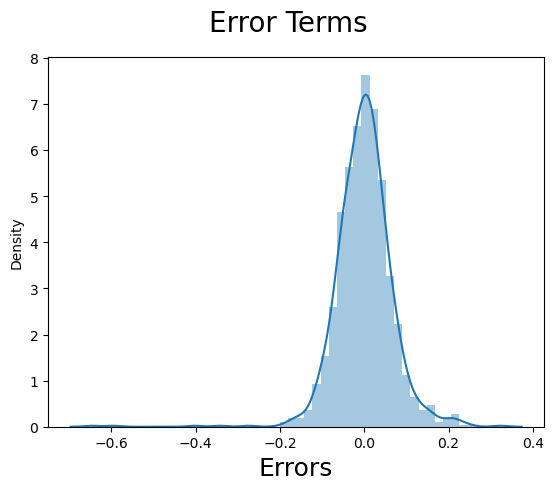

In [221]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

We can see here that the error terms are normally distributed and centered at 0.

<Axes: ylabel='SalePrice'>

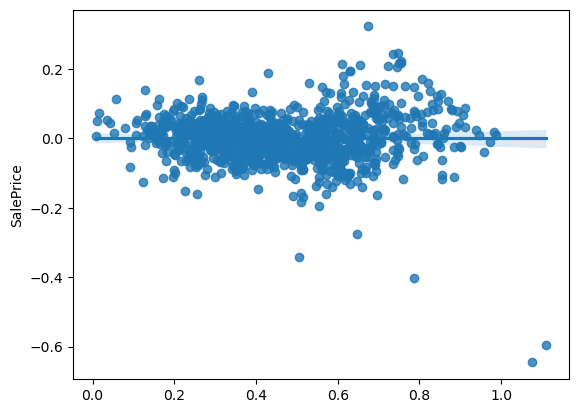

In [222]:
sns.regplot(x=y_pred, y=(y_train - y_pred))

The error terms mostly have constant variance and do not show any patterns

## Ridge Regression 

In [223]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [224]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 10000]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [225]:
result = pd.DataFrame(model_cv.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009897,0.005352,0.007557,0.005005,0.0001,{'alpha': 0.0001},-0.059846,-0.055601,-0.056483,-0.047309,-0.052543,-0.054356,0.004223,16,-0.041363,-0.048456,-0.046414,-0.049534,-0.048710,-0.046895,0.002950
1,0.012943,0.006563,0.005617,0.006092,0.001,{'alpha': 0.001},-0.059843,-0.055599,-0.056478,-0.047307,-0.052540,-0.054353,0.004222,15,-0.041365,-0.048456,-0.046412,-0.049533,-0.048710,-0.046895,0.002950
2,0.015445,0.001273,0.008287,0.006601,0.01,{'alpha': 0.01},-0.059818,-0.055573,-0.056436,-0.047296,-0.052511,-0.054327,0.004216,14,-0.041382,-0.048457,-0.046401,-0.049530,-0.048709,-0.046896,0.002943
3,0.012976,0.006509,0.000000,0.000000,0.05,{'alpha': 0.05},-0.059714,-0.055472,-0.056307,-0.047256,-0.052391,-0.054228,0.004194,13,-0.041462,-0.048470,-0.046378,-0.049520,-0.048711,-0.046908,0.002914
4,0.010752,0.008926,0.003322,0.006137,0.1,{'alpha': 0.1},-0.059602,-0.055379,-0.056237,-0.047241,-0.052258,-0.054144,0.004169,12,-0.041572,-0.048494,-0.046384,-0.049520,-0.048720,-0.046938,0.002876


In [226]:
print(model_cv.best_params_)

{'alpha': 1}


In [227]:
# optimal value of alpha found above
alpha=1

In [228]:
ridge = Ridge(alpha=alpha)

In [229]:
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [230]:
print(list(zip(df_train.columns, ridge.coef_)))

[('LotFrontage', -0.03190158743293153), ('LotArea', 0.08272356666465469), ('OverallQual', 0.22741911874671283), ('OverallCond', 0.1402857513514344), ('MasVnrArea', 0.013986540995754597), ('BsmtFinSF1', -0.009815998778301303), ('BsmtUnfSF', 0.04215516996102653), ('TotalBsmtSF', 0.04412284770730503), ('2ndFlrSF', 0.08810460643555856), ('GrLivArea', 0.2717426741527727), ('BsmtFullBath', 0.08093867113713188), ('BsmtHalfBath', 0.0004324288531509421), ('FullBath', 0.08362197875926962), ('HalfBath', 0.027269695078945326), ('BedroomAbvGr', 0.05480222325024353), ('KitchenAbvGr', -0.05297171609379015), ('Fireplaces', 0.07209704386069755), ('GarageCars', 0.1508222796164532), ('WoodDeckSF', 0.047187069629021285), ('OpenPorchSF', 0.03921382789181285), ('MSSubClass_30', -0.01468907474172923), ('MSSubClass_40', 0.012634461018911646), ('MSSubClass_45', -0.025016493492269073), ('MSSubClass_50', -0.0075815486228054995), ('MSSubClass_60', -0.03592678970275842), ('MSSubClass_70', -0.0005305857010978023), 

In [231]:
# training predictions
y_pred = ridge.predict(X_train)

# test predictions
y_test_pred = ridge.predict(X_test)

In [232]:
# train r2 score
print(r2_score(y_train, y_pred))

# test r2 score
print(r2_score(y_test, y_test_pred))

0.8770973494342547
0.8888692669879299


In [233]:
ridge_variables = pd.DataFrame({'col': df_train.columns, 'coef': ridge.coef_})
ridge_variables['coef'] = ridge_variables['coef'].apply(lambda x: round(x, 4))
ridge_variables['abs_coef'] = ridge_variables['coef'].apply(lambda x: abs(x))
ridge_variables.sort_values(by='abs_coef', ascending=False)

,col,coef,abs_coef
9,GrLivArea,0.2717,0.2717
2,OverallQual,0.2274,0.2274
17,GarageCars,0.1508,0.1508
3,OverallCond,0.1403,0.1403
31,MSSubClass_160,-0.1314,0.1314
56,Neighborhood_StoneBr,0.1039,0.1039
50,Neighborhood_NridgHt,0.1022,0.1022
32,MSSubClass_180,-0.1010,0.1010
49,Neighborhood_NoRidge,0.0936,0.0936
8,2ndFlrSF,0.0881,0.0881


We see 88.88% r2 score on the test dataset which is excellent. We also observe here that the most important variables according to ridge regression are `GrLivArea` with coefficient +2.717, `OverallQual` with coefficient +0.2274, `GarageCars` with coefficient +0.1508, `OverallCond` with coefficient +0.1403 and `MSSubClass_160` with coefficient -0.1314.

We also observe that ridge regression has shrunk the coefficients to 0 for a few parameters, but not exactly 0.

## Lasso Regression

In [234]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 10000]}

lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [235]:
result = pd.DataFrame(model_cv.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025255,0.014585,0.006156,0.003530,0.0001,{'alpha': 0.0001},-0.058238,-0.054282,-0.054722,-0.047246,-0.050934,-0.053084,0.003725,1,-0.042076,-0.048298,-0.046251,-0.049296,-0.048601,-0.046904,0.002619
1,0.017957,0.001357,0.004977,0.006452,0.001,{'alpha': 0.001},-0.063963,-0.055976,-0.057391,-0.055232,-0.057628,-0.058038,0.003093,2,-0.051910,-0.055806,-0.053321,-0.056755,-0.056013,-0.054761,0.001835
2,0.012504,0.006252,0.006248,0.007652,0.01,{'alpha': 0.01},-0.101998,-0.094967,-0.099218,-0.096372,-0.094246,-0.097360,0.002876,3,-0.093114,-0.097017,-0.096709,-0.096383,-0.095371,-0.095719,0.001415
3,0.021182,0.009621,0.006742,0.007865,0.05,{'alpha': 0.05},-0.153193,-0.147957,-0.164579,-0.151978,-0.142311,-0.152004,0.007347,4,-0.150787,-0.151383,-0.152320,-0.152779,-0.152578,-0.151970,0.000760
4,0.012558,0.006280,0.010071,0.007453,0.1,{'alpha': 0.1},-0.158677,-0.154451,-0.167253,-0.156551,-0.148976,-0.157182,0.005981,5,-0.156741,-0.157701,-0.154787,-0.157427,-0.159251,-0.157181,0.001452


In [236]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [237]:
alpha=0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(list(zip(df_train.columns, lasso.coef_)))

[('LotFrontage', -0.026809012080840217), ('LotArea', 0.04882594857068589), ('OverallQual', 0.24795252750119662), ('OverallCond', 0.14561562802207234), ('MasVnrArea', 0.0), ('BsmtFinSF1', -0.0), ('BsmtUnfSF', 0.032790367713803226), ('TotalBsmtSF', 0.0), ('2ndFlrSF', 0.04277845723874992), ('GrLivArea', 0.44194371875124816), ('BsmtFullBath', 0.07782053805879273), ('BsmtHalfBath', 0.0), ('FullBath', 0.06643681548649456), ('HalfBath', 0.021051960354619384), ('BedroomAbvGr', 0.031589693437256636), ('KitchenAbvGr', -0.05210086354362907), ('Fireplaces', 0.06344380721620402), ('GarageCars', 0.15062122319531449), ('WoodDeckSF', 0.045120002746880605), ('OpenPorchSF', 0.031659859650842774), ('MSSubClass_30', -0.00906586145440322), ('MSSubClass_40', 0.0), ('MSSubClass_45', -0.00989086129605598), ('MSSubClass_50', -0.004116934666602185), ('MSSubClass_60', -0.026884861958173856), ('MSSubClass_70', 0.001588740792453147), ('MSSubClass_75', 0.0162545642564329), ('MSSubClass_80', -0.014632592265666121), 

In [238]:
y_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [239]:
print(r2_score(y_train, y_pred))
print(r2_score(y_test, y_test_pred))

0.877095720105454
0.8932421799485527


In [240]:
lasso_variables = pd.DataFrame({'col': df_train.columns, 'coef': lasso.coef_})
lasso_variables['coef'] = lasso_variables['coef'].apply(lambda x: round(x, 3))
lasso_variables['abs_coef'] = lasso_variables['coef'].apply(lambda x: abs(x))
lasso_variables.sort_values(by='abs_coef', ascending=False)

,col,coef,abs_coef
9,GrLivArea,0.442,0.442
2,OverallQual,0.248,0.248
17,GarageCars,0.151,0.151
3,OverallCond,0.146,0.146
31,MSSubClass_160,-0.120,0.120
50,Neighborhood_NridgHt,0.107,0.107
56,Neighborhood_StoneBr,0.096,0.096
49,Neighborhood_NoRidge,0.094,0.094
32,MSSubClass_180,-0.087,0.087
55,Neighborhood_Somerst,0.082,0.082


The most important variables on Lasso regression are `GrLivArea` with coefficient +0.442, `OverallQual` with coefficient +0.248, `GarageCars` with coefficient +0.151, `OverallCond` with coefficient +0.146 and `MSSubClass_160` with coeffcient -0.120. The performance on unseen data for this is 89.32% which is excellent. We also see that Lasso regression has eliminated a few of the features by equating their coefficients to 0, hence contributing to model interpretability.

## Double value of alpha and find important predictors

In [241]:
alpha=2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(r2_score(y_train, y_pred))
print(r2_score(y_test, y_test_pred))

0.8752709305796056
0.8854580126630721


In [242]:
ridge_variables = pd.DataFrame({'col': df_train.columns, 'coef': ridge.coef_})
ridge_variables['coef'] = ridge_variables['coef'].apply(lambda x: round(x, 4))
ridge_variables['abs_coef'] = ridge_variables['coef'].apply(lambda x: abs(x))
ridge_variables.sort_values(by='abs_coef', ascending=False)

,col,coef,abs_coef
2,OverallQual,0.2131,0.2131
9,GrLivArea,0.2070,0.2070
17,GarageCars,0.1497,0.1497
3,OverallCond,0.1304,0.1304
31,MSSubClass_160,-0.1209,0.1209
50,Neighborhood_NridgHt,0.0955,0.0955
56,Neighborhood_StoneBr,0.0951,0.0951
8,2ndFlrSF,0.0908,0.0908
49,Neighborhood_NoRidge,0.0884,0.0884
32,MSSubClass_180,-0.0874,0.0874


In [243]:
alpha=0.0002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_train, y_pred))
print(r2_score(y_test, y_test_pred))

0.8738311163730876
0.889800497212516


In [244]:
lasso_variables = pd.DataFrame({'col': df_train.columns, 'coef': lasso.coef_})
lasso_variables['coef'] = lasso_variables['coef'].apply(lambda x: round(x, 3))
lasso_variables['abs_coef'] = lasso_variables['coef'].apply(lambda x: abs(x))
lasso_variables.sort_values(by='abs_coef', ascending=False)

,col,coef,abs_coef
9,GrLivArea,0.442,0.442
2,OverallQual,0.256,0.256
17,GarageCars,0.154,0.154
3,OverallCond,0.136,0.136
50,Neighborhood_NridgHt,0.101,0.101
31,MSSubClass_160,-0.100,0.100
49,Neighborhood_NoRidge,0.090,0.090
55,Neighborhood_Somerst,0.082,0.082
56,Neighborhood_StoneBr,0.080,0.080
10,BsmtFullBath,0.074,0.074


###	After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [245]:
X_train = X_train.drop(['GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars', 'MSSubClass_160'], axis=1)

In [246]:
X_test = X_test.drop(['GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars', 'MSSubClass_160'], axis=1)

In [247]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 10000]}

lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [248]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [249]:
alpha=0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_train, y_pred))
print(r2_score(y_test, y_test_pred))

0.8331700601968305
0.8218505513772154


In [250]:
lasso_variables = pd.DataFrame({'col': X_train.columns, 'coef': lasso.coef_})
lasso_variables['coef'] = lasso_variables['coef'].apply(lambda x: round(x, 3))
lasso_variables['abs_coef'] = lasso_variables['coef'].apply(lambda x: abs(x))
lasso_variables.sort_values(by='abs_coef', ascending=False)

,col,coef,abs_coef
5,TotalBsmtSF,0.287,0.287
44,Neighborhood_NoRidge,0.132,0.132
1,LotArea,0.127,0.127
9,FullBath,0.127,0.127
51,Neighborhood_StoneBr,0.126,0.126
45,Neighborhood_NridgHt,0.115,0.115
6,2ndFlrSF,0.108,0.108
86,KitchenQual_Ex,0.105,0.105
13,Fireplaces,0.104,0.104
50,Neighborhood_Somerst,0.099,0.099
